In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains

from simplemc.plots.plot_Quintom_variables import *
from simplemc.models.QuintomCosmology import QuintomCosmology
from simplemc.models.LCDMCosmology import LCDMCosmology
from simplemc.cosmo.paramDefs import *

# matplotlib.use('TkAgg')
%matplotlib inline

Initalizing nu density look up table... Done
Hello, World! I am process 0 of 1 on ubik


/home/isidro/Documents/gitHub/simplemc_tests/simplemc/analyzers/GA_deap.py:14: UserWarning: Please install DEAP library if you want to use ga_deap genetic algorithms.
  warnings.warn("Please install DEAP library if you want to use ga_deap genetic algorithms.")
/home/isidro/Documents/gitHub/simplemc_tests/simplemc/analyzers/elitism.py:6: UserWarning: Please install DEAP library if you want to use ga_deap genetic algorithms.
  warnings.warn("Please install DEAP library if you want to use ga_deap genetic algorithms.")


In [ ]:
    # dir_name = '/home/cosmocicatais/simpleMC/chains/'
dir_name = '/home/isidro/Documents/gitHub/simplemc_tests/simplemc/chains/'
# dir_name = '/home/isidro/Documents/gitHub/simplemc_tests/simplemc/chains/'
# dir_name = '/home/isidro/Documents/gitHub/simplemc_tests/simplemc/chains/350'
# dir_name = "/simplemc/chains/"


roots_couple = [
#                 'Quintom_couple_phy_HD_nested_multi',
#                 'Quintom_couple_phy_SN_nested_multi',
                'Quintom_couple_phy_CBAO_nested_multi',
#                 'Quintom_couple_phy_SN+HD_nested_multi',
                'Quintom_couple_phy_HD+CBAO_nested_multi',
#                 'Quintom_couple_phy_SN+CBAO_nested_multi',
                'Quintom_couple_phy_SN+HD+CBAO_nested_multi',
                ]

roots_couple_all = [
                'Quintom_couple_phy_HD_nested_multi',
                'Quintom_couple_phy_SN_nested_multi',
                'Quintom_couple_phy_CBAO_nested_multi',
# #                 'Quintom_couple_phy_SN+HD_nested_multi',
                'Quintom_couple_phy_HD+CBAO_nested_multi',
#                 'Quintom_couple_phy_SN+CBAO_nested_multi',
                'Quintom_couple_phy_SN+HD+CBAO_nested_multi',
                ]

roots_couple_final = [
                'Quintom_couple_phy_SN+HD+CBAO_nested_multi',
                ]

roots_quintom = ['Quintom_phy_HD_nested_multi',
                 'Quintom_phy_SN_nested_multi',
                 'Quintom_phy_CBAO_nested_multi',
                 'Quintom_phy_SN+HD_nested_multi',
                 'Quintom_phy_HD+CBAO_nested_multi',
                 'Quintom_phy_SN+CBAO_nested_multi',
                 'Quintom_phy_SN+HD+CBAO_nested_multi']

roots_quintess = [
                 'Quintess_phy_HD_nested_multi',
                 'Quintess_phy_SN_nested_multi',
                 'Quintess_phy_CBAO_nested_multi',
                 'Quintess_phy_SN+HD_nested_multi',
                 'Quintess_phy_HD+CBAO_nested_multi',
                 'Quintess_phy_SN+CBAO_nested_multi',
                 'Quintess_phy_SN+HD+CBAO_nested_multi',
                 ]

roots_phantom = [ 
                'Phantom_phy_HD_nested_multi',
                'Phantom_phy_SN_nested_multi',
                'Phantom_phy_CBAO_nested_multi',
                'Phantom_phy_SN+HD_nested_multi',
                'Phantom_phy_HD+CBAO_nested_multi',
                'Phantom_phy_SN+CBAO_nested_multi',
                'Phantom_phy_SN+HD+CBAO_nested_multi',
                 ]

roots_mix = [
#             'Quintom_couple_phy_HD_nested_multi',
#             'Quintom_couple_phy_SN_nested_multi',
#             'Quintom_couple_phy_CBAO_nested_multi',
#             'Quintom_couple_phy_SN+HD_nested_multi',
#             'Quintom_couple_phy_HD+CBAO_nested_multi',
#             'Quintom_couple_phy_SN+CBAO_nested_multi',
            'Quintom_couple_phy_SN+HD+CBAO_nested_multi',
#             'Quintom_phy_HD_nested_multi',
#             'Quintom_phy_SN_nested_multi',
#             'Quintom_phy_CBAO_nested_multi',
#             'Quintom_phy_SN+HD_nested_multi',
#             'Quintom_phy_HD+CBAO_nested_multi',
#             'Quintom_phy_SN+CBAO_nested_multi',
            'Quintom_phy_SN+HD+CBAO_nested_multi',
#             'Quintess_phy_HD_nested_multi',
#             'Quintess_phy_SN_nested_multi',
#             'Quintess_phy_CBAO_nested_multi',
#             'Quintess_phy_SN+HD_nested_multi',
#             'Quintess_phy_HD+CBAO_nested_multi',
#             'Quintess_phy_SN+CBAO_nested_multi',
            'Quintess_phy_SN+HD+CBAO_nested_multi',                
#             'Phantom_phy_HD_nested_multi',
#             'Phantom_phy_SN_nested_multi',
#             'Phantom_phy_CBAO_nested_multi',
#             'Phantom_phy_SN+HD_nested_multi',
#             'Phantom_phy_HD+CBAO_nested_multi',
#             'Phantom_phy_SN+CBAO_nested_multi',
            'Phantom_phy_SN+HD+CBAO_nested_multi',
            ]


roots_full_pantheon = [
                      'Quintom_couple_phy_Pantheon+HD+CBAO_nested_multi', 
                      'Quintom_couple_phy_SN+HD+CBAO_nested_multi']

    
type(roots_mix)

## Testing consistency of binned JLA and full Pantheon

In [3]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.2})

<Figure size 720x648 with 0 Axes>

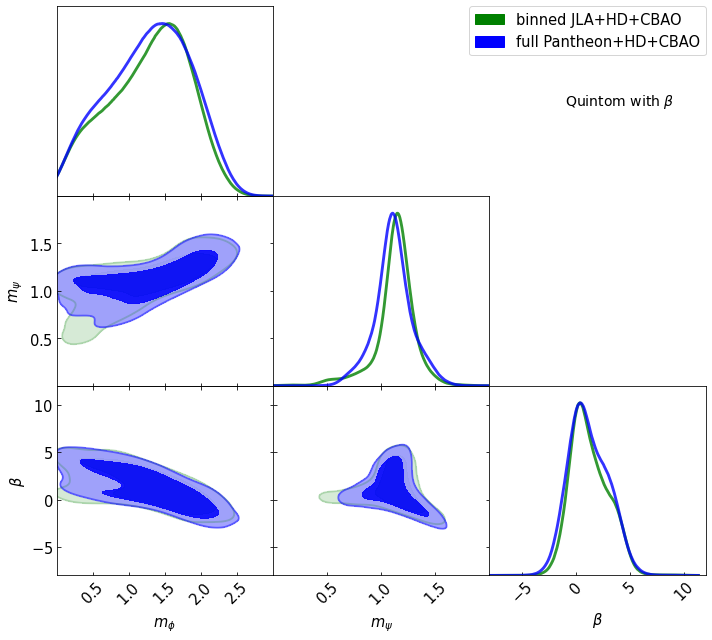

In [4]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


# g.triangle_plot(roots_couple, ['Om', 'Obh2', 'h', 'mquin', 'mphan', 'beta'],
g.triangle_plot(roots_full_pantheon, ['mquin', 'mphan', 'beta'],
                
# g.triangle_plot(roots, ['Om', 'Obh2', 'h'],
                diag1d_kwargs={'colors':['green', 'blue'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['green', 'blue'],
                alphas = [0.4, 0.9, 0.8],
                legend_labels=['binned JLA+HD+CBAO',
                               'full Pantheon+HD+CBAO'],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
                param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.grid()
plt.savefig('sn_consistency_quintom_couple.png', dpi=300)

### Triangle plot Phantom with coupling $\beta$

In [5]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.2})

<Figure size 720x648 with 0 Axes>

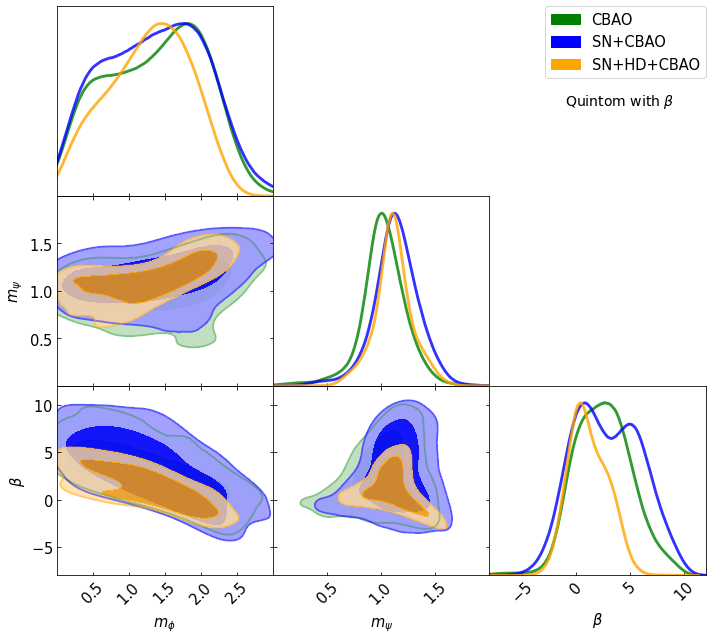

In [6]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.linewidth_contour = 2
g.settings.lw1 = 3

# g.triangle_plot(roots_couple, ['Om', 'Obh2', 'h', 'mquin', 'mphan', 'beta'],
g.triangle_plot(roots_couple, ['mquin', 'mphan', 'beta'],
                
# g.triangle_plot(roots, ['Om', 'Obh2', 'h'],
                diag1d_kwargs={'colors':['green', 'blue', 'orange', 'red', 'black', 'yellow'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['green', 'blue', 'orange', 'red', 'black', 'yellow'],
                alphas = [0.6, 0.9, 0.8],
                legend_labels=['CBAO', 
                               'SN+CBAO', 
                               'SN+HD+CBAO'],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
                param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.grid()
plt.savefig('TriangleQuintomCouple_smooth.png', dpi=80 )

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1})

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 25 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(roots_couple_all, 'h', 'beta', colors=['red','gray', 'green', 'blue', 'orange'], 
          filled=True, alphas = [0.3, 0.6, 0.6, 0.8, 1], 
          legend_loc='upper right')

gg.add_text('Quintom with $\\beta$', 0.05, 0.1, fontsize=25)    

gg.add_y_marker(0, color='green', lw=3.0)
gg.add_x_marker(0.7324, color='purple', lw=3.0, ls='dotted')
gg.add_x_marker(0.674, color='brown', lw=3.0, ls='dashdot')

plt.text(0.3, 14, '·-·- $H_0 = 67.4$', fontsize=22, color='brown')
plt.text(0.3, 12, '··· $H_0 = 73.24$', fontsize=22, color='purple')
plt.text(0.3, 10, '--- $\\beta = 0$', fontsize=22, color='green')

gg.add_legend(['HD', 'SN', 'BAO', 'BAO+HD', 'BAO+HD+SN'])
# plt.grid()
plt.savefig('hvsbeta_QuintomCouple.png', dpi=80)

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.2})

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 25 
gg.settings.linewidth_contour = 1



# plt.figure(figsize=(10,8))
gg.plot_2d(roots_couple_all, 'mquin', 'mphan',  colors=['red','gray', 'green', 'blue', 'orange'], 
          filled=True, alphas = [0.3, 0.6, 0.7, 0.9, 0.9],
          legend_loc='upper right', plot_3d_with_param='beta')

gg.add_text('Quintom with $\\beta$', 0.05, 0.95, fontsize=25)        

gg.add_legend(['HD', 'SN', 'BAO', 'BAO+HD', 'BAO+HD+SN'])
plt.xlim(-0.01, 4.2)
plt.ylim(-0.01, 3.2)
# plt.grid()
plt.savefig('mphinvsmphan_QuintomCouple.png', dpi=80)

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.2})

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 25 
gg.settings.linewidth_contour = 1



# plt.figure(figsize=(10,8))
gg.plot_3d(roots_couple_final, ['mquin', 'mphan','beta'], 
          legend_loc='upper right', scatter_size=30)

# max_scatter_points – if set, maximum number of points to plots from each root)

gg.add_text(' Quintom with $\\beta$\n BAO+HD+SN', 0.05, 0.95, fontsize=20)        

# gg.add_legend(['CBAO+HD+SN'])
# plt.xlim(-0.01, 4.2)
# plt.ylim(-0.01, 3.2)
# plt.grid()
plt.savefig('mphinvsmphan_QuintomCouple.png', dpi=80)

### MIX

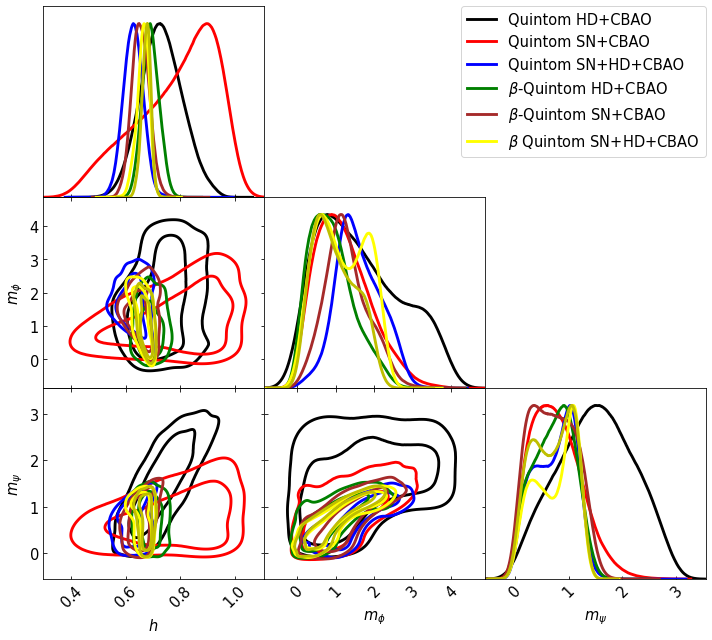

In [10]:
# plt.figure(figsize=(10, 10), dpi=100)

# gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
#                           ratio = 0.8, 
#                           analysis_settings={'smooth_scale_2D': 0.5,
#                                              'smooth_scale_1D': 0.5, 
#                                              'ignore_rows': 0.1})


#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
# g.settings.lw1 = 0.5

g.triangle_plot(roots_quintom, ['h', 'mquin', 'mphan'],
                diag1d_kwargs={'colors':['black', 'red','blue', 'green', 'brown', 'yellow'],  
                               'alphas':[1.0,1.0,1.0,1.0, 1.0, 1.0]},
                colors=['black', 'red','blue', 'green', 'brown', 'yellow'],
#                 alphas = [1.0, 0.7, 0.5],
                legend_labels=['Quintom HD+CBAO', 'Quintom SN+CBAO', 'Quintom SN+HD+CBAO', 
                               '$\\beta$-Quintom HD+CBAO', 
                               '$\\beta$-Quintom SN+CBAO', '$\\beta$ Quintom SN+HD+CBAO', 
                              ],
                legend_loc='upper right',
                filled = False,
                normalized=False, shaded=False)

        
#plt.show()
plt.savefig('TriangleQuintomAll.png', dpi=80)

<Figure size 1000x1000 with 0 Axes>

<Figure size 720x576 with 0 Axes>

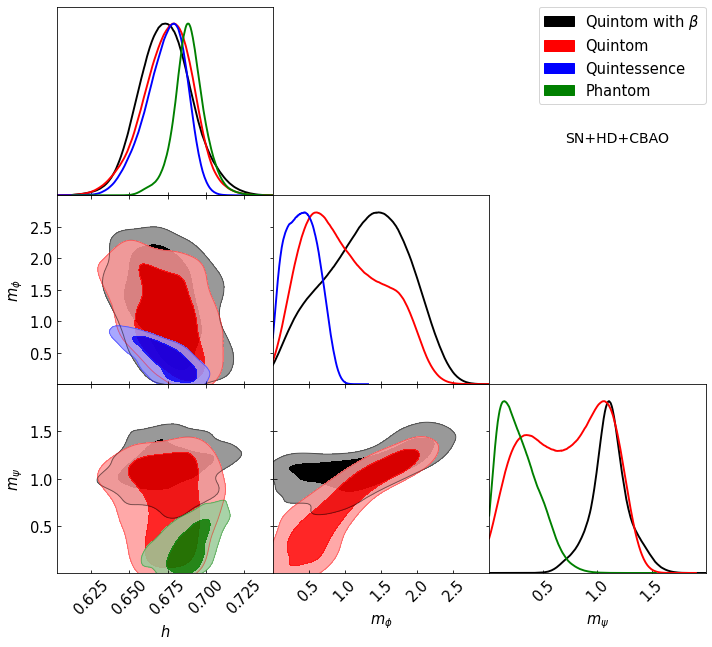

In [11]:
plt.figure(figsize=(10, 10), dpi=100)

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.2})


#g.settings.axes_fontsize = 5
gg.settings.lab_fontsize = 15
gg.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 15   
# g.settings.lw1 = 0.5

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15  
g.settings.linewidth_contour = 1

g.settings.lw1 = 2

# g.triangle_plot(roots_all, ['Om', 'Obh2', 'h', 'mquin', 'mphan'],
g.triangle_plot(roots_mix, ['h', 'mquin', 'mphan'],
                diag1d_kwargs={'colors':['black', 'red','blue', 'green', 'brown', 'purple'],  
                               'alphas':[1.0,1.0,1.0,1.0, 1.0, 1.0]},
                colors=['black', 'red','blue', 'green', 'brown', 'purple'],
#                 alphas = [1.0, 0.7, 0.5],
#                 legend_labels=['Quintom with $\\beta$ HD+CBAO', 'Quintom with $\\beta$ SN+CBAO', 
#                                'Quintom with $\\beta$ SN+HD+CBAO', 'Quintom HD+CBAO', 
#                                'Quintom SN+CBAO', 'Quintom SN+HD+CBAO', 'Quintess HD+CBAO', 
#                                'Quintess SN+CBAO', 'Quintess SN+HD+CBAO', 'Phantom HD+CBAO', 
#                                'Phantom SN+CBAO', 'Phantom SN+HD+CBAO',  
#                               ],
                                legend_labels=['Quintom with $\\beta$', 'Quintom', 
                                'Quintessence', 'Phantom'],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
                param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]})
        

g.add_text('SN+HD+CBAO', x= 0.35, y= 2.3, fontsize=14)
                
plt.savefig('TriangleMixQuintom.png', dpi=80)

In [12]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ roots_quintess[0], settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
mcstats.likeSummary()

'Best fit sample -log(Like) = 7.260031\nmean(-Ln(like)) = 9.123308\n-Ln(mean like)  = 8.549179\n'

In [13]:
for i in [0,1,2,3,4,5]:
    print(mcstats.list()[i])
#     top = mcstats.names[i].ND_limit_top[1]
#     low = mcstats.names[i].ND_limit_bot[1]
    best = mcstats.names[i].bestfit_sample
    print(best)
    #print(top)
    #print(low)
    print("best %4.5f"%(best))
    print("mean %4.5f"%(mcsamplefile.getMeans()[i]))
#     print("%4.3f + %4.3f - %4.3f"%(best, (top-best), (best-low)))
    print("std dev %5.4f"%(mcsamplefile.std(mcstats.list()[i])))
#     print("$  {%4.3f} \pm $"%(mcsamplefile.getMeans()[i]))
    print("${:.3f} \pm {:.3f}$".format(mcsamplefile.getMeans()[i], mcsamplefile.std(mcstats.list()[i])))
    print("--"*20)

Om
0.32339945
best 0.32340
mean 0.34181
std dev 0.0757
$0.342 \pm 0.076$
----------------------------------------
Obh2
0.02197647
best 0.02198
mean 0.02200
std dev 0.0005
$0.022 \pm 0.000$
----------------------------------------
h
0.67698689
best 0.67699
mean 0.64484
std dev 0.0525
$0.645 \pm 0.053$
----------------------------------------
mquin
0.0632428
best 0.06324
mean 0.81056
std dev 0.4973
$0.811 \pm 0.497$
----------------------------------------
HD_like
-7.25662202207757
best -7.25662
mean -8.16023
std dev 0.9162
$-8.160 \pm 0.916$
----------------------------------------
theory_prior
-0.0038616850989615374
best -0.00386
mean -0.32482
std dev 0.4831
$-0.325 \pm 0.483$
----------------------------------------


## EoS

In [14]:
steps = 9
coupling = 0

fname = 'Quintom_coupling_both'

In [15]:
if fname == 'Quintessence':
    T = QuintomCosmology(vary_mquin=True)
    name = fname
    mlabel = '$m_\phi$'

if fname == 'Phantom':
    T = QuintomCosmology(vary_mphan=True)
    name = fname
    mlabel = '$m_\psi$'

if fname == 'Quintom_mquin':
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True)
    mphan = 1.2
    name = 'Quintom, $m_{\psi}$=%0.1f'%mphan
    mlabel = '$m_\phi$'

if fname == 'Quintom_mphan':
    T = QuintomCosmology(vary_mquin=False, vary_mphan=True)
    mphi = 1.2
    name = 'Quintom, $m_{\phi}$=%0.1f'%mphi
    mlabel = '$m_\psi$'

if fname == 'Quintom_coupling_mquin':
    T = QuintomCosmology(vary_mquin=True, vary_coupling=True)
    mphan = 1.2
    coupling = 4.0
    name = 'Quintom, $m_{\psi}$=%0.1f, $\\beta=%0.1f$'%(mphan, coupling)
    mlabel = '$m_\phi$'

if fname == 'Quintom_coupling_mphan':
    T = QuintomCosmology(vary_mphan=True, vary_coupling=True)
    mphi = 1.0 #1.2
    coupling = 10 #6.0
    name = 'Quintom, $m_{\phi}$=%0.1f, $\\beta=%0.1f$'%(mphi, coupling)
    mlabel = '$m_\psi$'

if fname == 'Quintom_coupling_both':
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mphi = 2.0
    mphan = 1.0
    coupling = -1
    name = 'Quintom, $m_{\phi}$=%0.1f, $m_{\psi}$=%0.1f'%(mphi, mphan)
    mlabel = '$\\beta$'

if fname == 'Quintom_coupling_both':
    min, max = (4., 8.)
else:
    min, max = (0.1, 2.5)
if coupling < 0:
    min, max = (-10, -1.)


In [16]:
step = (max-min)/steps

mquin_ = mquin_par
mphan_ = mphan_par
coupling_ = coupling_par
om_ = Om_par
obh2_ = Obh2_par
h_ = h_par

ww = []
zz = []
PP = []


for i in np.arange(min, max, step):
    if fname == 'Quintessence':
        mquin_.setValue(i)
        T.updateParams([mquin_])

    if fname == 'Phantom':
        mphan_.setValue(i)
        T.updateParams([mphan_])


    if fname == 'Quintom_mquin':
        mquin_.setValue(i)
        mphan_.setValue(mphan)
        T.updateParams([mquin_, mphan_])


    if fname == 'Quintom_mphan':
        mphan_.setValue(i)
        mquin_.setValue(mphi)
        T.updateParams([mquin_, mphan_])

    if fname == 'Quintom_coupling_mquin':
        mquin_.setValue(i)
        mphan_.setValue(mphan)
        coupling_.setValue(coupling)
        T.updateParams([mquin_, mphan_, coupling_])

    if fname == 'Quintom_coupling_mphan':
        mquin_.setValue(mphi)
        mphan_.setValue(i)
        coupling_.setValue(coupling)
        T.updateParams([mquin_, mphan_, coupling_])

    if fname == 'Quintom_coupling_both':
        mquin_.setValue(mphi)
        mphan_.setValue(mphan)
        coupling_.setValue(i)
        T.updateParams([mquin_, mphan_, coupling_])


    T.call_functions()
    zl = np.arange(0, 3, 0.05)
    ww.append([T.w_de(1./(1+z)) for z in zl])
    PP.append(i)
    zz.append(zl)


In [17]:
np.shape(ww), np.shape(ww), np.shape(zl)

((9, 60), (9, 60), (60,))

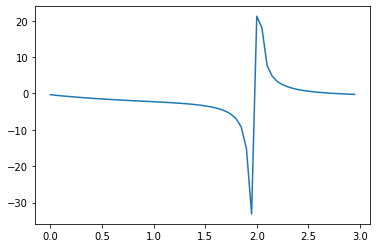

In [18]:
plt.plot(zz[7], np.array(ww[7]).reshape(60,))

Text(0.5, 0, 'z')

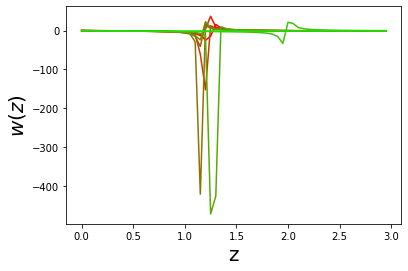

In [19]:
# -- Plot 1
for x, w, z in zip(zz, ww, PP):
    g = (float(z) - min)/(max - min)
    b, r = 0, 1 - g
    plt.plot(x, w, color=(r, g, b))

plt.ylabel('$w(z)$', fontsize=20)
plt.xlabel('z', fontsize=20)



In [20]:
cmap_reversed = matplotlib.cm.get_cmap('Blues_r')

In [21]:
def eos(z, params):
#     mphi, mphan, coupling = params
    om, obh2, h, mphi, mphan, coupling = params
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mquin_.setValue(mphi)
    mphan_.setValue(mphan)
    coupling_.setValue(coupling)
    om_.setValue(om)
    obh2_.setValue(obh2)
    h_.setValue(h)

    T.updateParams([om_, obh2_, h_, mquin_, mphan_, coupling_])
    T.call_functions()
    return T.w_de(1./(1+z))

/home/isidro/Documents/gitHub/simplemc_tests/simplemc/chains/Quintom_couple_phy_SN+HD+CBAO_nested_multi_1.txt
Removed no burn in


  0%|          | 0/968 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

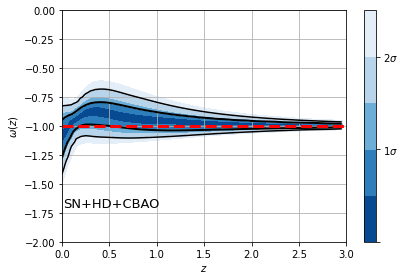

In [22]:
file_root = dir_name + 'Quintom_couple_phy_SN+HD+CBAO_nested_multi'
# file_root = dir_name + '350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root,
                                               settings={'ignore_rows':0.0})
# k = np.linspace(0,2,9)
k = np.arange(0, 3, 0.05)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2], 
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2],  )
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='r',  linestyles='dashed', label='$w=-1$', lw=3)
# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.ylim(-2,0)
plt.xlim(0, 3)
plt.tight_layout()
plt.grid()

# plt.legend(loc='lower left')
plt.text(0.01,-1.7, 'SN+HD+CBAO', fontsize=13)
plt.savefig('eos_quintom_couple_sn+hd+cbao.png', dpi=300)
plt.savefig('eos_quintom_couple_sn+hd+cbao.svg')
# plt.text(0.01,-1.7, 'CBAO', fontsize=13)
# plt.savefig('eos_quintom_couple_cbao_burn3.png', dpi=300)
# plt.savefig('eos_quintom_couple_cbao_burn3.svg')


In [23]:
def hoverzfn(z, params):
    om, obh2, h, mphi, mphan, coupling = params
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mquin_.setValue(mphi)
    mphan_.setValue(mphan)
    coupling_.setValue(coupling)
    om_.setValue(om)
    obh2_.setValue(obh2)
    h_.setValue(h)

    T.updateParams([om_, obh2_, h_, mquin_, mphan_, coupling_])
#     mphi, mphan, coupling = params
#     T = QuintomCosmology(vary_mquin=True, vary_coupling=True)
#     mquin_.setValue(mphi)
#     mphan_.setValue(mphan)
#     coupling_.setValue(coupling)
#     T.updateParams([mquin_, mphan_, coupling_])
    T.call_functions()
    H = T.Hubble_a(1./(1+z))
    return H/(1+z)

/home/isidro/Documents/gitHub/simplemc_tests/simplemc/chains/Quintom_couple_phy_CBAO_nested_multi_1.txt
Removed 0.5 as burn in


  0%|          | 0/935 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

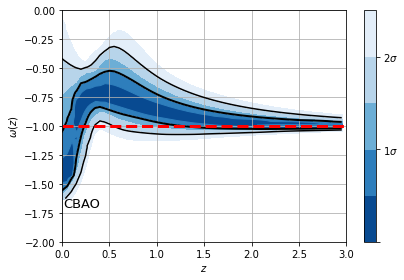

In [24]:
# file_root = dir_name + '350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
file_root = dir_name + 'Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root,
                                               settings={'ignore_rows':0.5})
# k = np.linspace(0,2,9)
k = np.arange(0, 3, 0.05)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2], 
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2],  )
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='r',  linestyles='dashed', label='$w=-1$', lw=3)

# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.ylim(-2,0)
plt.xlim(0, 3)
plt.tight_layout()
plt.grid()

# plt.legend(loc='lower left')
# plt.text(0.01,-1.7, 'SN+HD+CBAO', fontsize=13)
# plt.savefig('eos_quintom_couple_sn+hd+cbao.png', dpi=300)
# plt.savefig('eos_quintom_couple_sn+hd+cbao.svg')
plt.text(0.01,-1.7, 'CBAO', fontsize=13)
plt.savefig('eos_quintom_couple_cbao_burn5.png', dpi=300)
plt.savefig('eos_quintom_couple_cbao_burn5.svg')


In [25]:
def hoverzfn_lcdm(z):
    T = LCDMCosmology()
    h = 67.4*np.sqrt(T2.RHSquared_a(1./(1+z)))
    return h/(1+z)

# zlcdm = np.arange(0,2.1, 0.1)
# hlcdm = np.array([hoverzfn(z) for z in zlcdm])
# plt.plot(zlcdm, hlcdm)

In [26]:
z = np.linspace(0, 3, 100)
rd_fid_DR12 = 147.78

zLyaA = 2.37
zLyaC = 2.35
zCombBAO1 = 0.38
zCombBAO2 = 0.51
zCombBAO3 = 0.61
fact = (300000./rd_fid_DR12)

def ersys(x, y):
    return np.sqrt(x**2 + y**2)


In [ ]:
file_root = dir_name + '/350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
# file_root = dir_name + '/350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root, 
                                              settings={'ignore_rows':0.0})
# k = np.linspace(0,2.0,100)
k = np.arange(0,3, 0.05)

cbar = plot_contours(hoverzfn, k, samples, weights=weights, contour_line_levels=[1,2],  
                     colors=cmap_reversed, linewidths=[2,1.5] )
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

# plt.errorbar(0.02,  69.8,       yerr=0.8, color='green', fmt='o', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.38,  63.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.51,  62.6,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.61,  61.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.34,  65.6,       yerr=3.3, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.36,  67.8,       yerr=3.4, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)

#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='yellow', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='yellow', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)

f0 = np.loadtxt("DM_all.txt")[:, 0]
f1 = np.loadtxt("DM_all.txt")[:, 1]

plt.plot(f0, f1, color='red', label=r'$\Lambda CDM$', lw=3,  linestyle='dashed')

# plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
# plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.xlim(0,3)
plt.ylim(45,80)
plt.tight_layout()
pylab.grid(True)


plt.legend(loc='lower left')
plt.text(0.01,76, 'SN+HD+CBAO', fontsize=13)
plt.savefig('hzfn_quintom_couple_sn+hd+cbao.png', dpi=300)
plt.savefig('hzfn_quintom_couple_sn+hd+cbao.svg')
# plt.text(0.01,76, 'CBAO', fontsize=13)
# plt.savefig('hzfn_quintom_couple_cbao.png', dpi=300)
# plt.savefig('hzfn_quintom_couple_cbao.svg')

  0%|          | 0/1407 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

In [ ]:
# file_root = dir_name + '/350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
file_root = dir_name + '/350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root, 
                                              settings={'ignore_rows':0.0})
# k = np.linspace(0,2.0,100)
k = np.arange(0,3, 0.05)

cbar = plot_contours(hoverzfn, k, samples, weights=weights, contour_line_levels=[1,2],  
                     colors=cmap_reversed, linewidths=[2,1.5] )
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='yellow', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='yellow', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='yellow', fmt='d', markersize=6, elinewidth=1.5)
# plt.errorbar(0.02,  69.8,       yerr=0.8, color='green', fmt='o', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.38,  63.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.51,  62.6,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.61,  61.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.34,  65.6,       yerr=3.3, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.36,  67.8,       yerr=3.4, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)


f0 = np.loadtxt("DM_all.txt")[:, 0]
f1 = np.loadtxt("DM_all.txt")[:, 1]

plt.plot(f0, f1, color='r', label=r'$\Lambda CDM$', lw=3,  linestyle='dashed')

# plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
# plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.xlim(0,3)
plt.ylim(45,80)
plt.tight_layout()
pylab.grid(True)


plt.legend(loc='lower left')
# plt.text(0.01,76, 'SN+HD+CBAO', fontsize=13)
# plt.savefig('hzfn_quintom_couple_sn+hd+cbao.png', dpi=300)
# plt.savefig('hzfn_quintom_couple_sn+hd+cbao.svg')
plt.text(0.01,76, 'CBAO', fontsize=13)
plt.savefig('hzfn_quintom_couple_cbao.png', dpi=300)
plt.savefig('hzfn_quintom_couple_cbao.svg')

In [ ]:
plt.plot(f0, f1, color='red', label=r'$\Lambda CDM$', lw=2,)

In [ ]:
plt.errorbar(0.02,  69.8, yerr=0.8, color='red', fmt='o', markersize=5, elinewidth=1., capsize=5, capthick=2)
plt.errorbar(0.38,  63.9, yerr=1.0, color='red', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
plt.errorbar(0.51,  62.6, yerr=1.0, color='red', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
plt.errorbar(0.61,  61.9, yerr=1.0, color='red', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
plt.errorbar(2.34,  65.6, yerr=3.3, color='red', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)
plt.errorbar(2.36,  67.8, yerr=3.4, color='red', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)

f0 = np.loadtxt("DM_all.txt")[:, 0]
f1 = np.loadtxt("DM_all.txt")[:, 1]
plt.plot(f0, f1, color='blue')

In [ ]:
def hfn(z, params):
    om, obh2, h, mphi, mphan, coupling = params
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mquin_.setValue(mphi)
    mphan_.setValue(mphan)
    coupling_.setValue(coupling)
    om_.setValue(om)
    obh2_.setValue(obh2)
    h_.setValue(h)

    T.updateParams([om_, obh2_, h_, mquin_, mphan_, coupling_])
#     mphi, mphan, coupling = params
#     T = QuintomCosmology(vary_mquin=True, vary_coupling=True)
#     mquin_.setValue(mphi)
#     mphan_.setValue(mphan)
#     coupling_.setValue(coupling)
#     T.updateParams([mquin_, mphan_, coupling_])
    T.call_functions()
    H = T.Hubble_a(1./(1+z))
    return H

In [ ]:
file_root = dir_name + '/350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
# file_root = dir_name + '/350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root)
# k = np.linspace(0,2.0,100)
k = np.arange(0, 2.5, 0.05)

cbar = plot_contours(hfn, k, samples, weights=weights, colors=cmap_reversed, linewidths=[2,1.5,1],
                    contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

# plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$H(z)[km\;s^{-1}Mpc^{-1}]$')
# plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
# plt.ylim(60,)
plt.tight_layout()
pylab.grid(True)

plt.text(0.01,250, 'SN+HD+CBAO', fontsize=13)
plt.savefig('hfn_quintom_couple_sn+hd+cbao.png', dpi=300)
plt.savefig('hfn_quintom_couple_sn+hd+cbao.svg')
# plt.text(0.01,250, 'CBAO', fontsize=13)
# plt.savefig('hfn_quintom_couple_cbao.png', dpi=300)
# plt.savefig('hfn_quintom_couple_cbao.svg')

In [ ]:
#Planck best fit cosmology
T2 = LCDMCosmology()
x1 = [67.4*np.sqrt(T2.RHSquared_a(1./(1+z))) for z in zl]
x2 = [T2.HIOverrd(z)*z/fixer(z) for z in zl]
x3 = [T2.DaOverrd(z)/fixer(z) for z in zl]
#PLK-15
#T=LCDMCosmology(Obh2=0.02225,Om=0.3156,h=0.6727)




params1 = {'backend': 'pdf',
               'axes.labelsize': 18,
               'xtick.labelsize': 18,
               'ytick.labelsize': 18,
               'legend.fontsize': 16,
               'lines.markersize': 6,
               'font.size': 20,
               'text.usetex': True}
pylab.rcParams.update(params1)


## --- Plotting --
fig, (ax2, ax3, ax4)= plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(7,10))
fig.suptitle(name, fontsize=17,  y=0.95)




## -- Plot 2
ax2.plot(zl, x1 , color='k', linestyle='--')
ax2.set_ylabel('$H(z)$', fontsize=20)



## -- Plot 3
ax3.plot(zl, x2 , color='k', linestyle='--')
ax3.set_ylabel("${\\rm zD_H(z)}/r_d\\sqrt{z}$")


## -- Plot 4
ax4.plot(zl, x3, color='k', linestyle='--')
ax4.set_xlim(0.05, 3)
ax4.set_ylabel("${\\rm D_M(z)}/r_d\\sqrt{z}$")





#Axis
ax4.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax4.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax4.xaxis.set_minor_formatter(plt.ScalarFormatter())
#ax4.xaxis.set_major_locator(plt.FixedLocator([0.1,1.0]))
#ax4.xaxis.set_minor_locator(plt.FixedLocator([0.2,0.5,2]))
ax4.set_xlabel("$z$")


#pylab.savefig("Fig1_"+fname+".pdf", bbox_inches='tight')
pylab.show()



In [ ]:
z = np.linspace(0, 3, 100)
rd_fid_DR12 = 147.78

zLyaA = 2.37
zLyaC = 2.35
zCombBAO1 = 0.38
zCombBAO2 = 0.51
zCombBAO3 = 0.61
fact = (300000./rd_fid_DR12)

def ersys(x, y):
    return np.sqrt(x**2 + y**2)

#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='red', fmt='d', markersize=6, elinewidth=1.5)

# plt.plot(z, [100*0.682*(0.30*(1+zi)**3 + (1-0.30))**0.5/(1+zi) for zi in z], 'red', lw=1.5)
#plt.ylim(55, 80)
plt.ylim(50, 85)
plt.tight_layout()
plt.show()